In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [76]:
stock_sentiment_df = pd.read_csv('/Users/urmitmahida34/Downloads/stock_sentiment.csv')
stock_sentiment_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [77]:
stock_sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [78]:
stock_sentiment_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [79]:
stock_sentiment_df['Sentiment'].unique()

array([1, 0])

In [80]:
stock_sentiment_df['Sentiment'].value_counts()

Sentiment
1    3685
0    2106
Name: count, dtype: int64

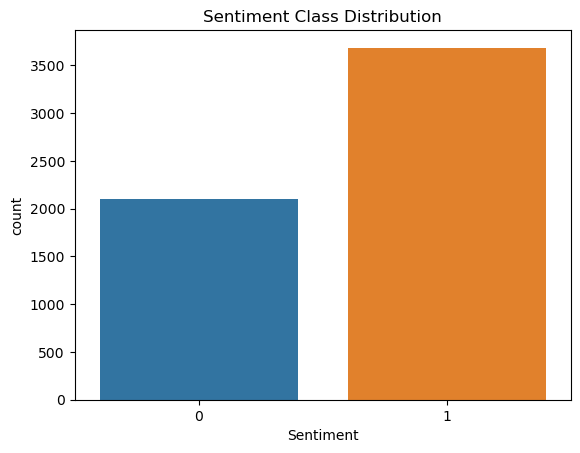

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=stock_df, x='Sentiment')
plt.title('Sentiment Class Distribution')
plt.show()

### Data preprocessing

### Remove punctuations from text

In [82]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
def remove_func(message):
    Test_punc_removed = [char for char in message if char not in string .punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    
    return Test_punc_removed_join

In [84]:
stock_sentiment_df['Text-Without-Punctuations'] = stock_sentiment_df['Text'].apply(remove_func)
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


### Remove stopwords

In [85]:
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/urmitmahida34/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [86]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# After analyzing the data, it was observed that some frequently repeated words needed to be removed from the dataset
stop_words.extend(['from', 'subject', 'https', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

# Defining a preprocessing function to remove stopwords and short words (less than 3 characters long), as they don't add value to the data

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >=3 and token not in stop_words:
            result.append(token)
    return result

In [87]:
stock_sentiment_df['Text_Pre-processed'] = stock_sentiment_df['Text-Without-Punctuations'].apply(preprocess)
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations,Text_Pre-processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


### Plotting wordcloud

In [88]:
# joining the preprocessed text into a string
stock_sentiment_df['Text_Pre-processed-joined'] = stock_sentiment_df['Text_Pre-processed'].apply(lambda x: " ".join(x))
stock_sentiment_df

,Text,Sentiment,Text-Without-Punctuations,Text_Pre-processed,Text_Pre-processed-joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


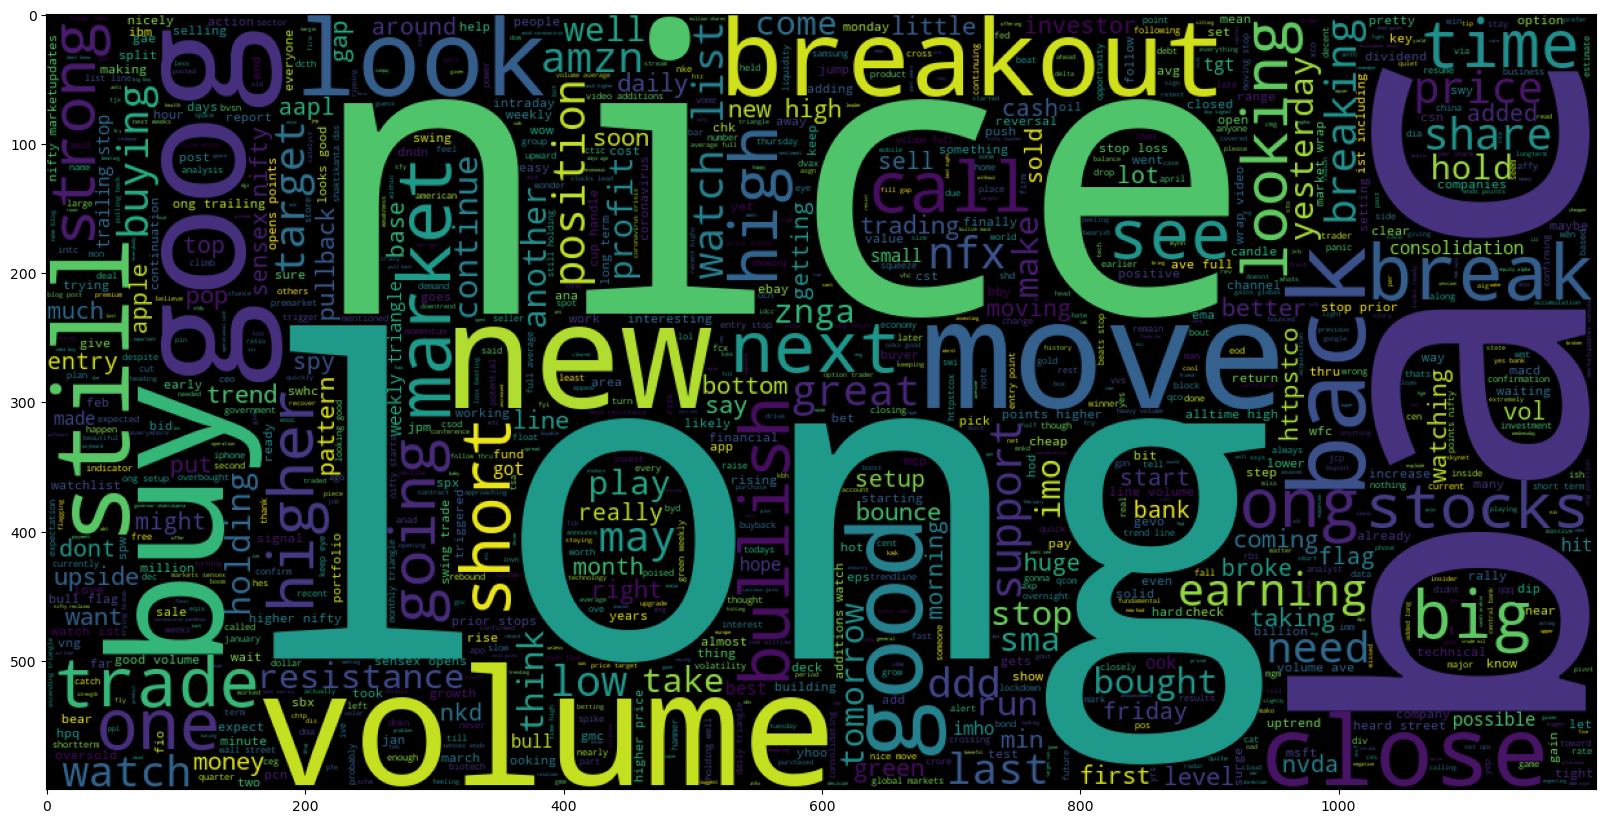

In [89]:
# Plot WORDCLOUD for sentiment class '1':
plt.figure(figsize=(20,20))
wc_1 = WordCloud(max_words = 1000, width = 1200, height = 600)\
                        .generate(" ".join(stock_sentiment_df[stock_sentiment_df['Sentiment']==1]['Text_Pre-processed-joined']))
plt.imshow(wc_1)

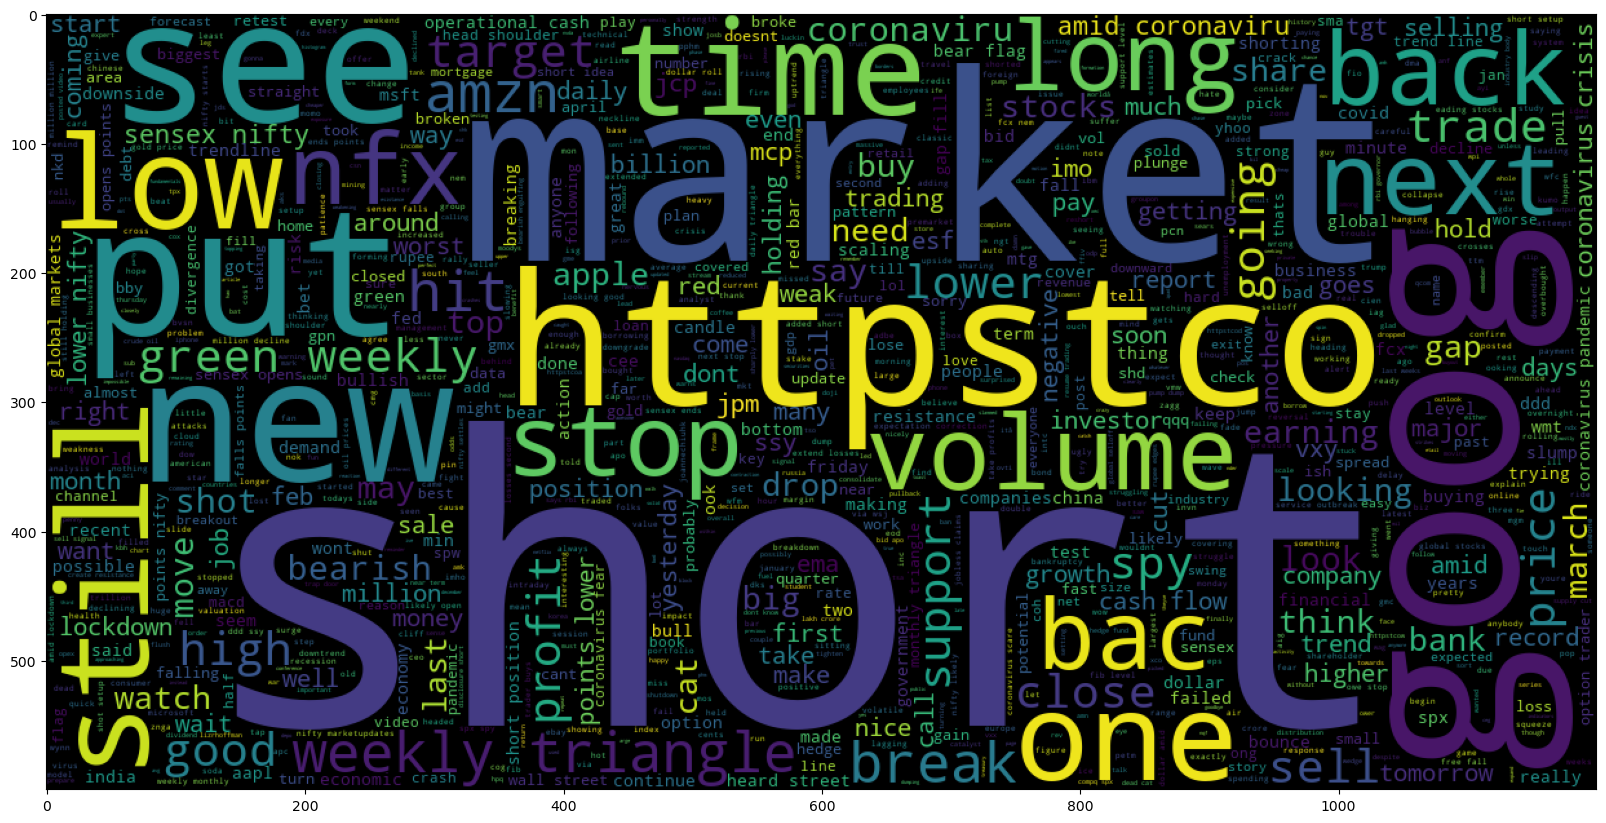

In [90]:
# Plot WORDCLOUD for sentiment class '0':
plt.figure(figsize=(20,20))
wc_0 = WordCloud(max_words = 1000, width = 1200, height = 600)\
                                      .generate(" ".join(stock_df[stock_df['Sentiment']==0]['Text_Pre-processed-joined']))
plt.imshow(wc_0)

### Visualization of dataset

In [91]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/urmitmahida34/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [92]:
# tokenize text into words
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text_Pre-processed-joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

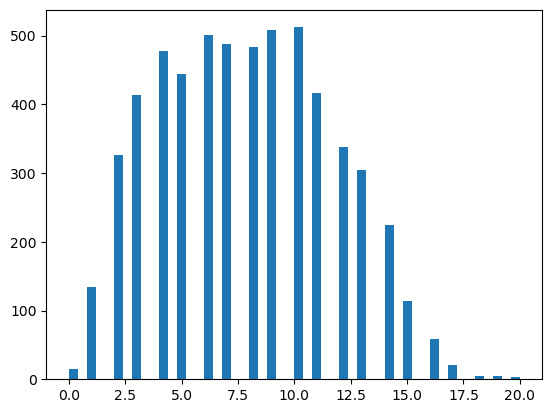

In [93]:
# create histogram to visualize tokenized data
plt.figure()
plt.hist(tweets_length, bins =50)
plt.show()

### Here, we analyze the distribution of tweet lengths and observe that the majority of tweets consist of 5 to 10 words. The histogram depicting this distribution resembles a bell curve, indicating a typical pattern in tweet length distribution.


### Prepare data by tokenization & padding

In [94]:
# tokenize words by converting text into sequence of integers

In [95]:
# total number of words in dataset
list_of_words = []

for i in stock_df['Text_Pre-processed']:
    for j in i:
        list_of_words.append(j)
        
total_words  = len(set(list_of_words))
total_words

9268

In [96]:
X = stock_df['Text_Pre-processed']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [97]:
X_train.shape

(4632,)

In [98]:
X_test.shape

(1159,)

In [99]:
X_train

1389                       [cat, ooking, miss, gap, fill]
73      [nbelieveable, payment, trend, vcs, chasing, e...
2178    [mcbc, long, healthy, pullback, sweet, zone, u...
3262    [bac, marketmaket, make, lot, short, seller, t...
2346    [innovative, drugs, may, win, approval, early,...
                              ...                        
5385    [heard, street, allowing, foreign, central, ba...
2719    [vxy, zbf, reversal, fed, distributing, cash, ...
4631                          [kumo, earjet, kumo, twist]
5440    [march, exports, shrink, outlook, grim, corona...
3974    [bullish, technical, divergence, momentum, ind...
Name: Text_Pre-processed, Length: 4632, dtype: object

In [100]:
# creating tokenizer to tokenize the words & create sequence of tokenized words
tokenizer = Tokenizer(num_words = total_words)

tokenizer.fit_on_texts(X_train)

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [101]:
train_sequences

[[108, 300, 570, 56, 200],
 [3411, 865, 64, 3412, 1702, 1144, 2305, 771, 53, 344, 3413, 24, 47],
 [3414, 4, 1004, 142, 2306, 866, 772, 2307, 116, 571, 1005],
 [10, 3415, 99, 246, 1, 1145, 404, 100, 84],
 [2308, 1378, 62, 1006, 1146, 234, 3416, 5, 143, 1007, 572, 499, 3417],
 [3418, 176, 14],
 [634, 91, 117, 3419, 162],
 [3420, 185, 33, 50, 2, 3421, 1703, 3422],
 [430, 48, 2309, 72, 4, 635, 405],
 [63, 126, 80, 28],
 [13, 1, 345, 704, 2310, 1379, 573, 773, 431, 704, 102, 193, 574, 301, 3423],
 [255, 1147, 1, 267],
 [24, 636, 222, 575],
 [2311, 302, 268, 3424, 466, 3425, 177, 2312, 109],
 [378, 186, 774, 163, 54, 867, 57, 346, 775, 85, 345, 1148, 4, 256, 162, 6],
 [201, 316, 247, 868, 269, 2313, 2314],
 [576, 202, 71, 93, 16, 432, 202, 467],
 [1704, 406],
 [39, 2315, 1008],
 [1705, 2316, 1, 19, 2317, 2, 77, 433, 194, 329, 155],
 [2318, 223, 3426, 3427, 1149],
 [1706, 1380, 1707, 379, 257, 57, 58, 17, 187, 1708, 3428, 3429],
 [407, 635, 705, 72, 1009],
 [3430, 2319, 35, 88, 11, 36, 118, 1

In [102]:
# In this step, we perform padding on the training and testing data.
#The objective is to ensure that all sequences in our data have the same length. 
# By doing so, we make the input data uniform in size, which enhances the efficiency of the deep learning model. 
# Padding involves adding zeros at the beginning of sequences to make them equal in length.
padded_train = pad_sequences(train_sequences, maxlen=15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen=15, padding = 'post', truncating = 'post')

In [103]:
padded_train

array([[ 108,  300,  570, ...,    0,    0,    0],
       [3411,  865,   64, ...,   47,    0,    0],
       [3414,    4, 1004, ...,    0,    0,    0],
       ...,
       [3410, 8182, 3410, ...,    0,    0,    0],
       [ 100, 2797, 3150, ...,    0,    0,    0],
       [  40,  564,  519, ...,    0,    0,    0]], dtype=int32)

In [104]:
padded_train.shape

(4632, 15)

In [105]:
padded_test.shape

(1159, 15)

In [106]:
y_train

1389    0
73      1
2178    1
3262    1
2346    1
       ..
5385    0
2719    0
4631    0
5440    0
3974    1
Name: Sentiment, Length: 4632, dtype: int64

In [107]:
# converting y_train & y_test to 2D representations
# By converting y_train and y_test to categorical 2D representation, we ensure that the output layer of our neural network has two neurons. 
# corresponding to the two classes in our dataset (0 and 1). When neuron 1 fires, it indicates class 0, and neuron 2 firing indicates class 1. 
# This representation allows us to effectively model the binary classification task.
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

y_train_cat

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [108]:
y_test_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [109]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(padded_train, y_train, test_size=0.2, random_state=42)

# Instantiate TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)

# Fit TPOTClassifier on training data
tpot.fit(padded_train, y_train)

# Evaluate TPOTClassifier on testing data
y_pred = tpot.predict(padded_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Export the optimized pipeline as Python code
tpot.export('tpot_pipeline.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6606207814054488

Generation 2 - Current best internal CV score: 0.6610525138571439

Generation 3 - Current best internal CV score: 0.6668842803255352

Generation 4 - Current best internal CV score: 0.6690413116465246

Generation 5 - Current best internal CV score: 0.6690413116465246

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.65, min_samples_leaf=8, min_samples_split=7, n_estimators=100)
Accuracy: 0.6626402070750647


In [110]:
## Below is the tpot_pipeline.py generated code 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Average CV score on the training set was: 0.6748712141863602
exported_pipeline = RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(padded_train, y_train)
results = exported_pipeline.predict(padded_test)
accuracy = accuracy_score(y_test, results)
print("Accuracy:", accuracy)

Accuracy: 0.6686798964624676


### The TPOTClassifier automatically searches for the best pipeline (including model and hyperparameters). 
### It found a pipeline with certain hyperparameters that achieved an accuracy of 65.92%.
### The manually trained RandomForestClassifier used specific hyperparameters and achieved an accuracy of 65.57%.


### NN to perofrm setiment analysis

In [111]:
model = Sequential()

model.add(Embedding(total_words, output_dim = 512))  

model.add(LSTM(256))

model.add(Dense(128, activation = 'relu')) 
model.add(Dropout(0.3)) 

model.add(Dense(2, activation = 'softmax')) 

model.build(input_shape=(4632, 15))
model.compile(optimizer =  'adam', loss = 'binary_crossentropy', metrics = ['acc']) 
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (4632, 15, 512)        │     4,745,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (4632, 256)            │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (4632, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (4632, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (4632, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,565,826 (21.23 MB)

 Trainable params: 5,565,826 (21.23 MB)

 Non-trainable params: 0 (0.00 B)

In [112]:
model.fit(padded_train, y_train_cat, batch_size =32, validation_split=0.2, epochs = 10)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.6421 - loss: 0.6516 - val_acc: 0.7465 - val_loss: 0.5347
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - acc: 0.8655 - loss: 0.3289 - val_acc: 0.7573 - val_loss: 0.5281
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - acc: 0.9472 - loss: 0.1557 - val_acc: 0.7433 - val_loss: 0.6436
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.9696 - loss: 0.0947 - val_acc: 0.7357 - val_loss: 0.8506
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - acc: 0.9821 - loss: 0.0640 - val_acc: 0.7271 - val_loss: 0.9026
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.9830 - loss: 0.0513 - val_acc: 0.7454 - val_loss: 1.1918
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.9811 - loss: 0.0551 - val_acc: 0.7325 - val_loss: 1.0499
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.9902 - loss: 0.0275 - val_acc: 0.7292 - val_loss: 1.5435
Epoch 9/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/

In [113]:
# THUS WE ACHIEVED AN ACCURACY OF 94.82% AND VALIDATION-ACCURACY AS 77.13%

### Training model evaluation

In [114]:
pred = model.predict(padded_test)

predicted_y  = []
for i in pred:
    predicted_y.append(np.argmax(i))
    
predicted_y

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


[0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [117]:
original_y = []
for i in y_test_cat:
    original_y.append(np.argmax(i))
    
original_y

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [118]:
# Test model on unseen data
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

accuracy = accuracy_score(original_y, predicted_y)
accuracy

0.7515099223468508

In [120]:
f1 = f1_score(original_y, predicted_y)
precision = precision_score(original_y, predicted_y)
recall = recall_score(original_y, predicted_y)
auc = roc_auc_score(original_y, predicted_y)

print("f1 for the model is: {}".format(f1))
print("Precision for the model is: {}".format(precision))
print("Recall for the model is: {}".format(recall))
print("AUC for the model is: {}".format(auc))

f1 for the model is: 0.8190954773869347
Precision for the model is: 0.7697756788665879
Recall for the model is: 0.8751677852348994
AUC for the model is: 0.702076646240638
